# Implementation of clustering algorithms

Build K-Means and Agglomerative Clustering models to perform an unsupervised clustering by using given data. Follow below steps as a guideline for building your model and explain each of them in code lines. 

* Data cleaning (25 points)

Start with data cleaning to ensure that your data is correct, consistent and usable. The techniques used for data cleaning may vary but you can consider to follow these basic steps: handling missing values, encoding categorical features, extracting useful features by using existing features, handling outliers etc.

* Data Preprocessing (25 points)

In this step you should transform raw data into an understandable format for machine learning algorithms. This step may include scaling the features, performing dimensionality reduction etc.

* Clustering (30)

The goal of this step is to find distinct groups or “clusters” within a data set by using K-Means and Agglomerative Clustering Algorithms. Apply Elbow Method to determine the number of clusters. After building models, examine and comment the clusters formed via scatter plot.

* Silhouette Scores (20)

To evaluate how “well clustered” data points are, use the “silhouette score” and plot the Silhouette Scores for all of data points.

Note: Don't forget to explain your codes and comment on the obtained result.

In [471]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [472]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [473]:
data = pd.read_csv("data.csv")
df = pd.DataFrame(data)

a, b = df.shape
print("Length of DataFrame:", a)
print("Width of DataFrame:", b)
df.head()

Length of DataFrame: 1001
Width of DataFrame: 30


Unnamed: 0    ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0           0  5524        1957  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1
1           1  2174        1954  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0
2           2  4141        1965  Graduation       Together  71613.0        0         0  21-08-2013       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0
3           3  6182        1984  Graduation       Together  26646.0        1         0  10-02-2014       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0
4           4  5324        1981         PhD        Married  58293.0        1         0  19-01-2014       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0

As you can see our data has 1001 rows and 30 columns.

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1001 non-null   int64  
 1   ID                   1001 non-null   int64  
 2   Year_Birth           1001 non-null   int64  
 3   Education            1001 non-null   object 
 4   Marital_Status       1001 non-null   object 
 5   Income               988 non-null    float64
 6   Kidhome              1001 non-null   int64  
 7   Teenhome             1001 non-null   int64  
 8   Dt_Customer          1001 non-null   object 
 9   Recency              1001 non-null   int64  
 10  MntWines             1001 non-null   int64  
 11  MntFruits            1001 non-null   int64  
 12  MntMeatProducts      1001 non-null   int64  
 13  MntFishProducts      1001 non-null   int64  
 14  MntSweetProducts     1001 non-null   int64  
 15  MntGoldProds         1001 non-null   i

As you can see our data is mainly int type. We have two categorical feature which are Education and Martial_Status. We have two date feature which are Year_Birth and Dt_customer. We will dummy variable to categorical feature. And I will handle with date formats.

In [475]:
df.describe().transpose()

count          mean           std     min      25%      50%       75%       max
Unnamed: 0           1001.0    500.000000    289.108111     0.0    250.0    500.0    750.00    1000.0
ID                   1001.0   5707.617383   3260.634183     0.0   2928.0   5692.0   8595.00   11191.0
Year_Birth           1001.0   1968.804196     12.407321  1893.0   1959.0   1970.0   1978.00    1996.0
Income                988.0  52516.707490  21880.847852  2447.0  35611.5  51523.5  68828.25  162397.0
Kidhome              1001.0      0.454545      0.558732     0.0      0.0      0.0      1.00       2.0
Teenhome             1001.0      0.483516      0.553153     0.0      0.0      0.0      1.00       2.0
Recency              1001.0     49.092907     28.831864     0.0     25.0     49.0     74.00      99.0
MntWines             1001.0    307.374625    338.030665     0.0     23.0    183.0    507.00    1492.0
MntFruits            1001.0     25.614386     39.494115     0.0      1.0      8.0     29.00     199.0
MntMeatProducts      1001.0    171.456543    228.123476     1.0     16.0     69.0    252.00    1725.0
MntFishProducts      1001.0     37.964036     54.356607     0.0      3.0     13.0     50.00     254.0
MntSweetProducts     1001.0     27.541459     41.211121     0.0      1.0      9.0     35.00     263.0
MntGoldProds         1001.0     44.903097     53.634985     0.0      8.0     24.0     58.00     362.0
NumDealsPurchases    1001.0      2.286713      1.869415     0.0      1.0      2.0      3.00      15.0
NumWebPurchases      1001.0      4.013986      2.710683     0.0      2.0      3.0      6.00      27.0
NumCatalogPurchases  1001.0      2.771229      3.096548     0.0      0.0      2.0      4.00      28.0
NumStorePurchases    1001.0      5.841159      3.248037     0.0      3.0      5.0      8.00      13.0
NumWebVisitsMonth    1001.0      5.238761      2.409966     0.0      3.0      6.0      7.00      20.0
AcceptedCmp3         1001.0      0.063936      0.244761     0.0      0.0      0.0      0.00       1.0
AcceptedCmp4         1001.0      0.075924      0.265009     0.0      0.0      0.0      0.00       1.0
AcceptedCmp5         1001.0      0.067932      0.251755     0.0      0.0      0.0      0.00       1.0
AcceptedCmp1         1001.0      0.063936      0.244761     0.0      0.0      0.0      0.00       1.0
AcceptedCmp2         1001.0      0.013986      0.117491     0.0      0.0      0.0      0.00       1.0
Complain             1001.0      0.007992      0.089085     0.0      0.0      0.0      0.00       1.0
Z_CostContact        1001.0      3.000000      0.000000     3.0      3.0      3.0      3.00       3.0
Z_Revenue            1001.0     11.000000      0.000000    11.0     11.0     11.0     11.00      11.0
Response             1001.0      0.134865      0.341750     0.0      0.0      0.0      0.00       1.0

In [476]:
df.isnull().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 13
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

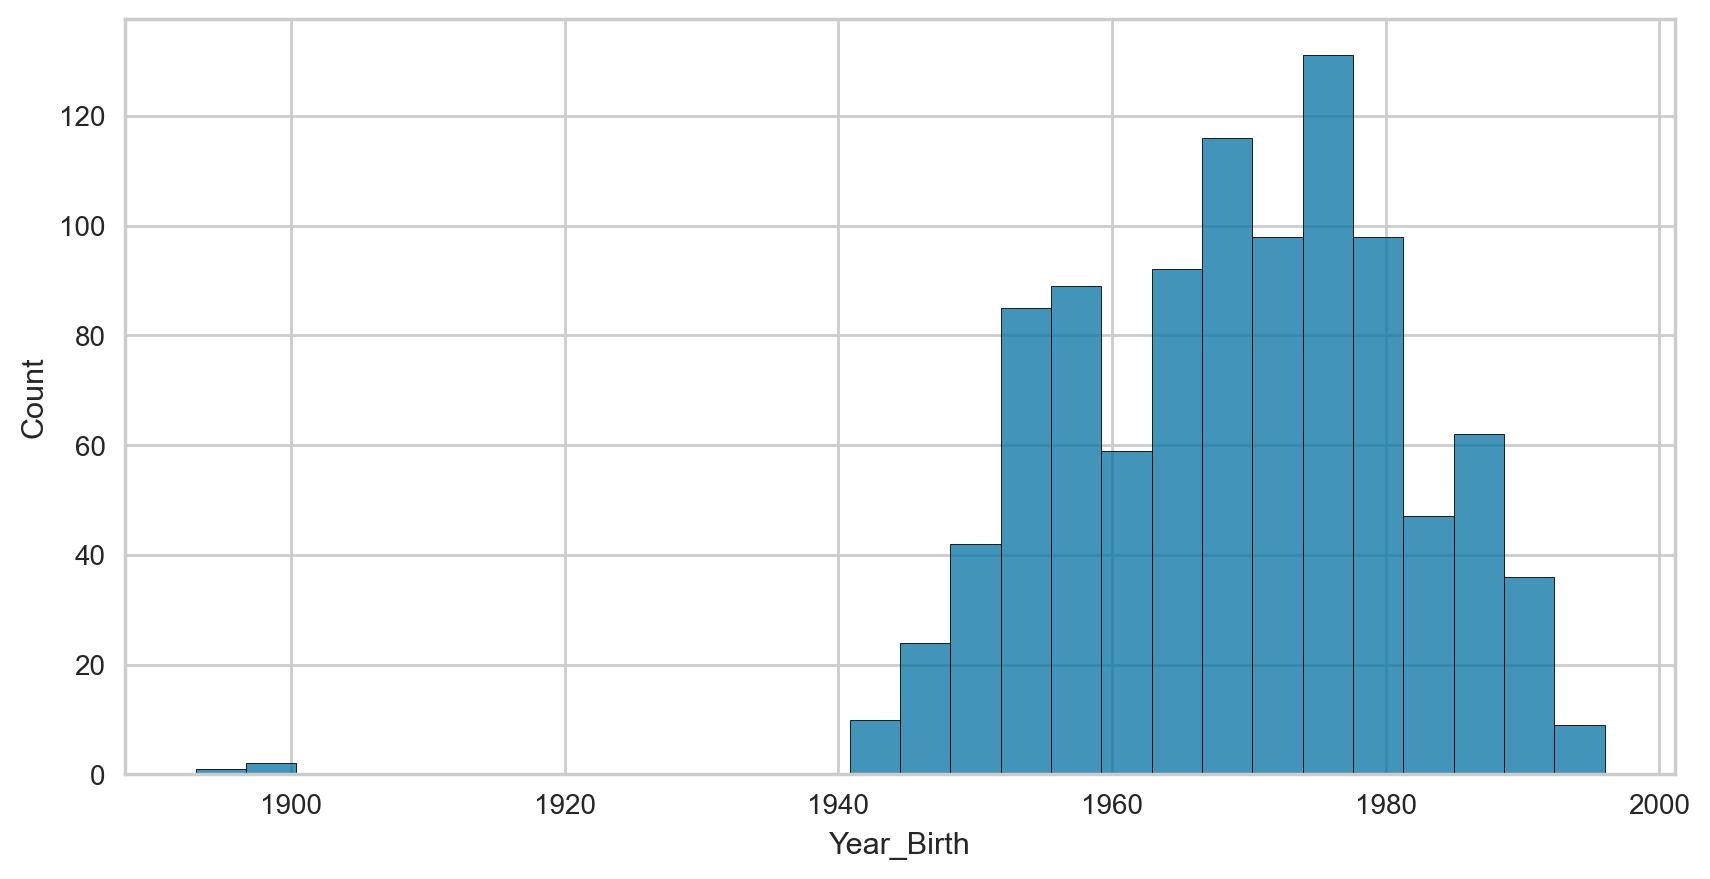

In [477]:

plt.figure(figsize=(10,5),dpi=200)
sns.histplot(data=df,x='Year_Birth')

In [478]:
df['Age'] = 2021 - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)

As you can see I create new feature which is age of customer and I droped Year_Birth column. I did this because I think it will more useful for my models.

<AxesSubplot:xlabel='Age', ylabel='Count'>

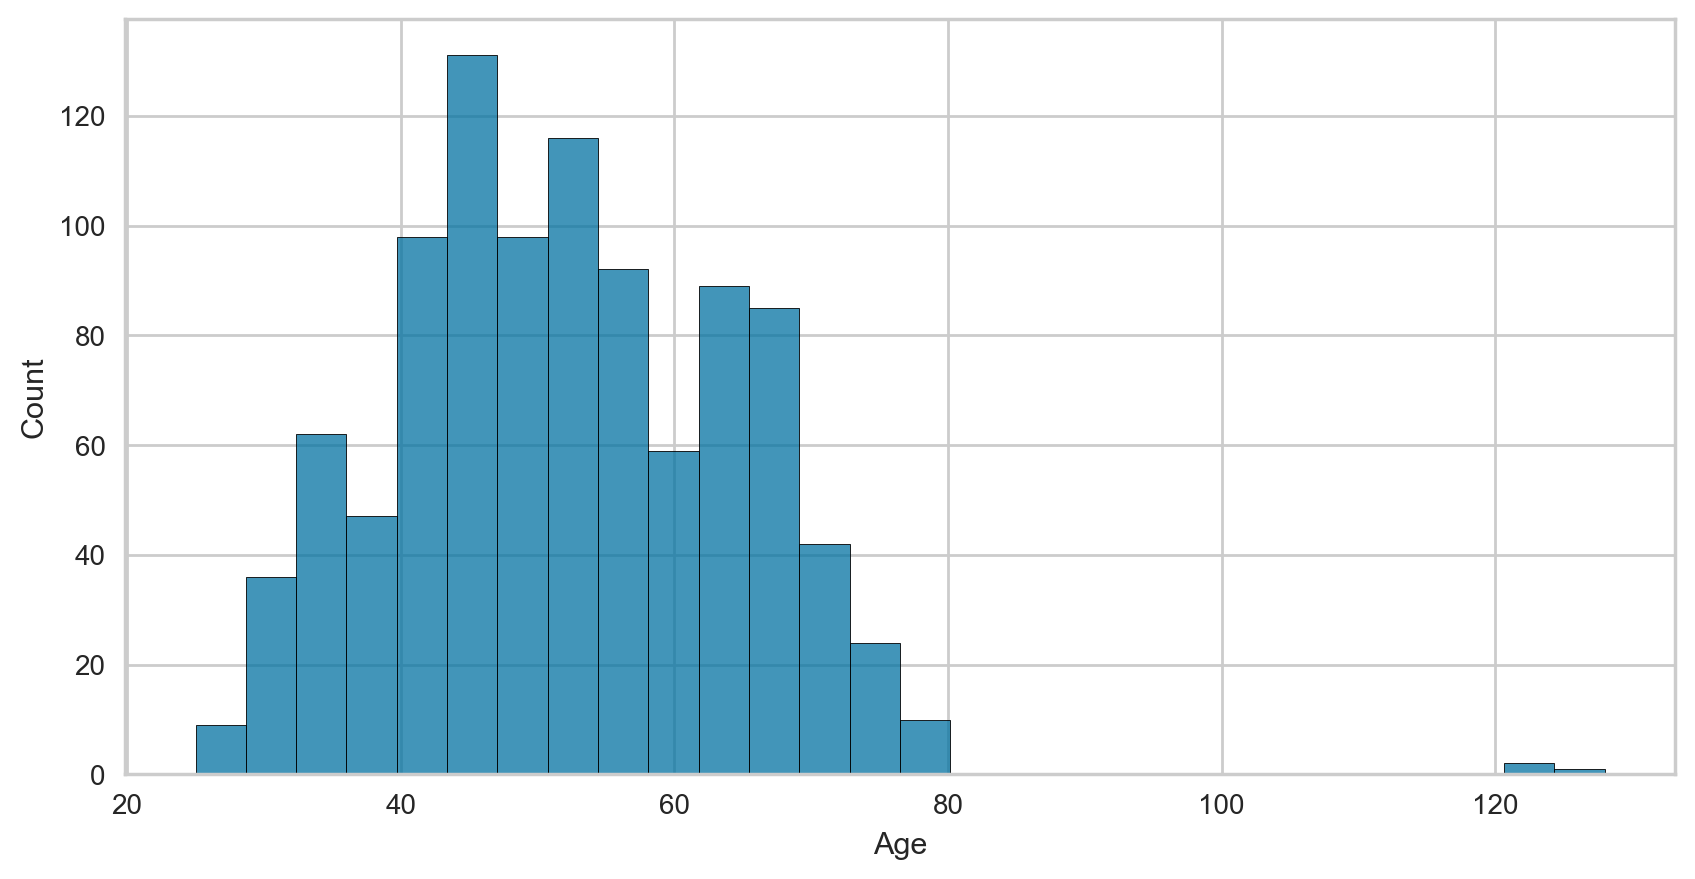

In [479]:
plt.figure(figsize=(10,5),dpi=200)
sns.histplot(data=df,x='Age')

In [480]:
df.head()

Unnamed: 0    ID   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Age
0           0  5524  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1   64
1           1  2174  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0              3         11         0   67
2           2  4141  Graduation       Together  71613.0        0         0  21-08-2013       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0              3         11         0   56
3           3  6182  Graduation       Together  26646.0        1         0  10-02-2014       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0              3         11         0   37
4           4  5324         PhD        Married  58293.0        1         0  19-01-2014       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0              3         11         0   40

<AxesSubplot:xlabel='Education', ylabel='count'>

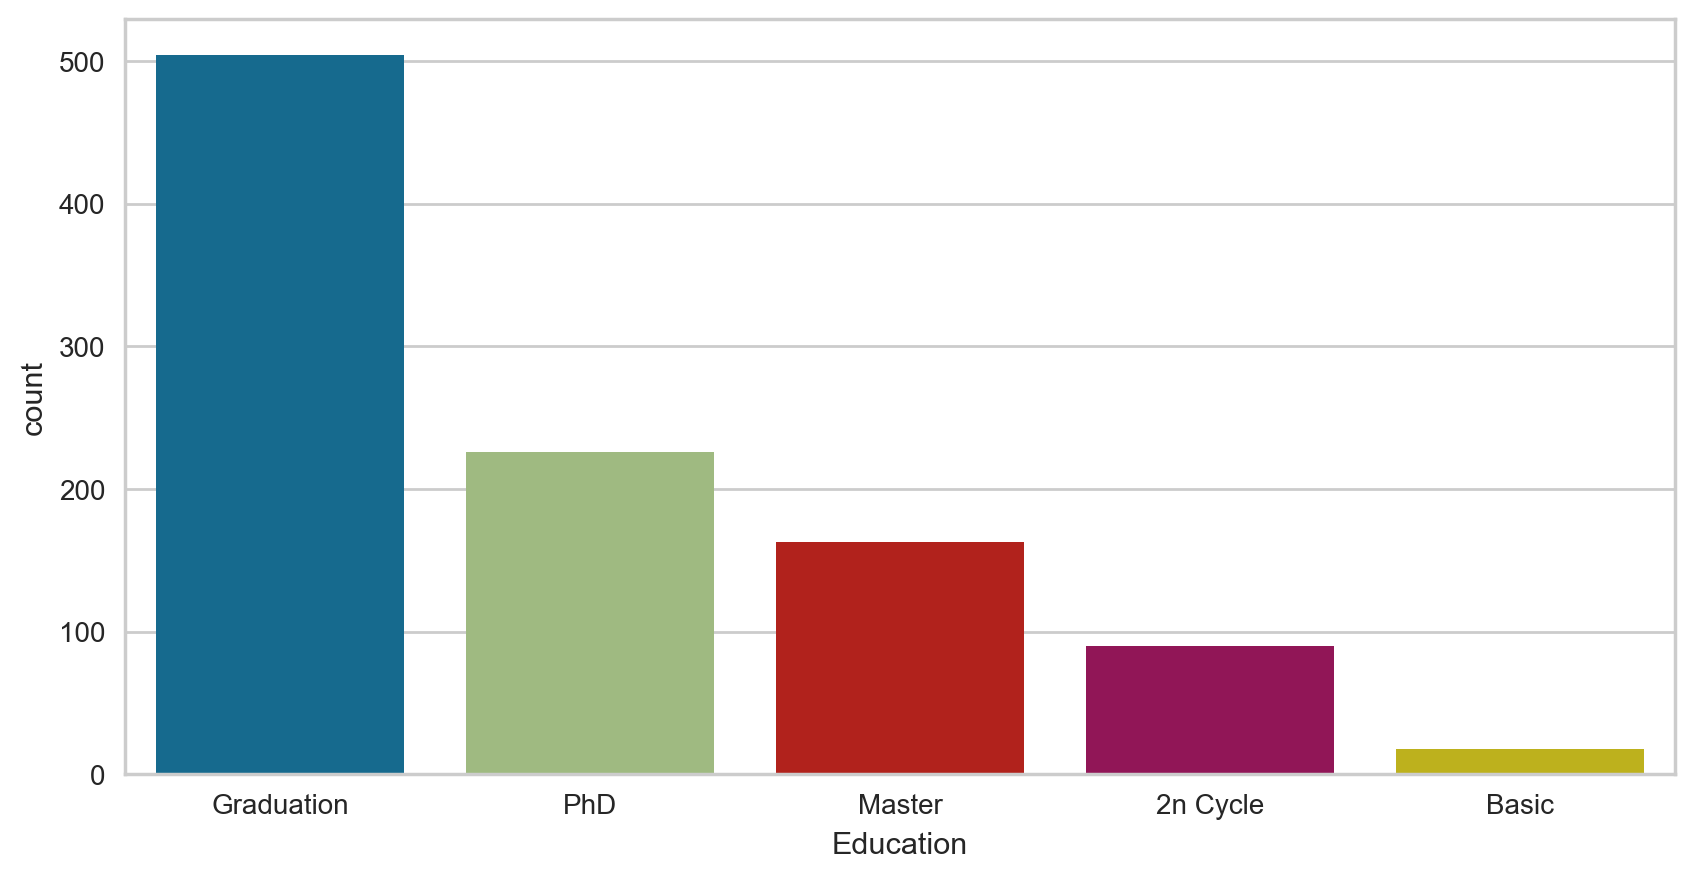

In [481]:
plt.figure(figsize=(10,5),dpi=200)
sns.countplot(data=df,x='Education',order=df['Education'].value_counts().index)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

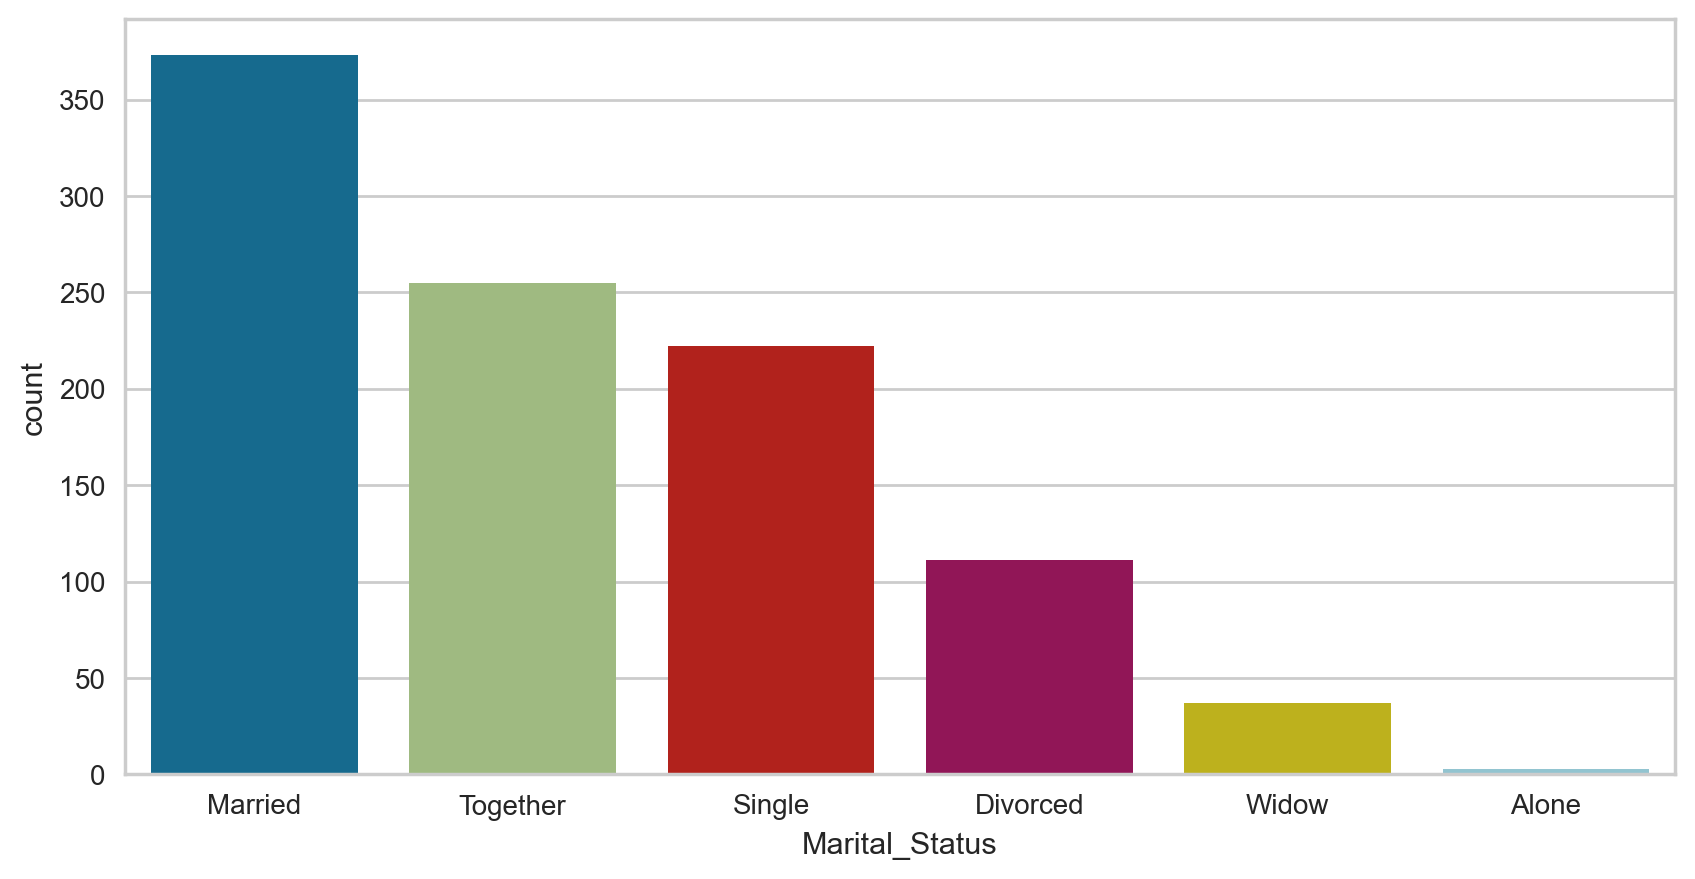

In [482]:
plt.figure(figsize=(10,5),dpi=200)
sns.countplot(data=df,x='Marital_Status', order=df['Marital_Status'].value_counts().index)

<AxesSubplot:xlabel='Income', ylabel='Count'>

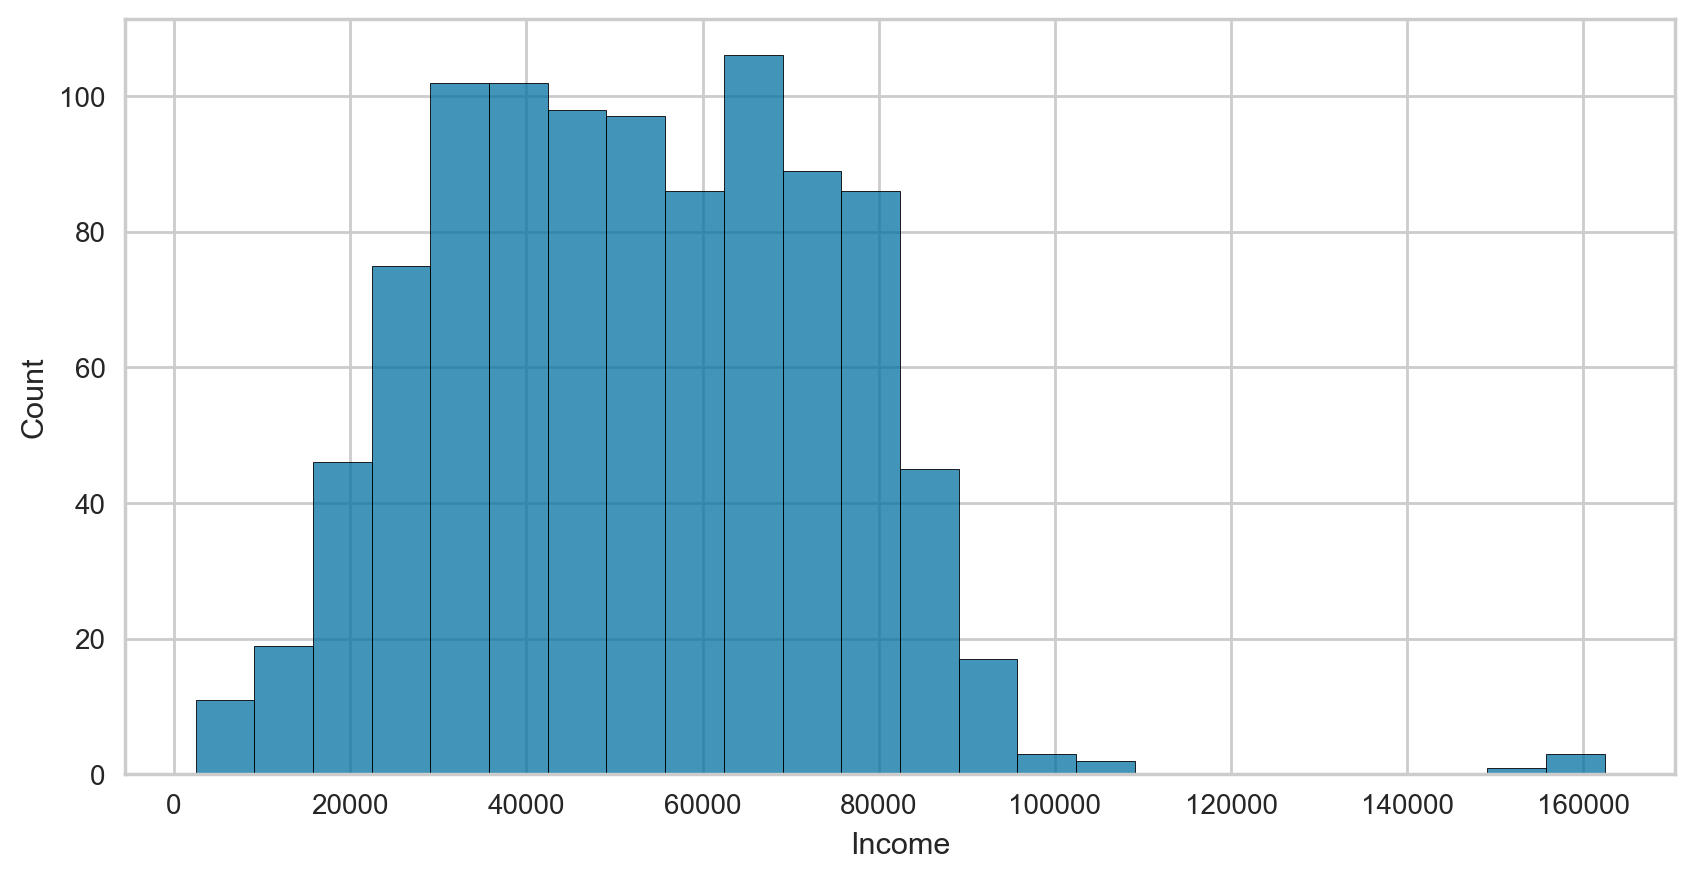

In [483]:
plt.figure(figsize=(10,5),dpi=200)
sns.histplot(data=df,x='Income')

In [484]:
df["Z_CostContact"].value_counts()

3    1001
Name: Z_CostContact, dtype: int64

In [485]:
df["Z_Revenue"].value_counts()

11    1001
Name: Z_Revenue, dtype: int64

In [486]:
df.drop(df[["Z_CostContact", "Z_Revenue"]], axis=1, inplace=True)


I droped Z_CostContact, Z_Revenue columns because they are same for all observation and they will not help to my model.

In [487]:
df.head()

Unnamed: 0    ID   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age
0           0  5524  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1   64
1           1  2174  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0   67
2           2  4141  Graduation       Together  71613.0        0         0  21-08-2013       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0   56
3           3  6182  Graduation       Together  26646.0        1         0  10-02-2014       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0   37
4           4  5324         PhD        Married  58293.0        1         0  19-01-2014       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0   40

In [488]:
df['Income'].fillna(df['Income'].median(), inplace=True)

I handled missing values in Income by inputing because this column have few missing values and it will useful for my model. Also I chosed median instead of mean becuse there is some outliers and mean will affect from outlier.

{'whiskers': [<matplotlib.lines.Line2D at 0x21b651b8b50>,
 'caps': [<matplotlib.lines.Line2D at 0x21b651c71f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b651b8910>],
 'medians': [<matplotlib.lines.Line2D at 0x21b651c7850>],
 'fliers': [<matplotlib.lines.Line2D at 0x21b651c7b80>],
 'means': []}

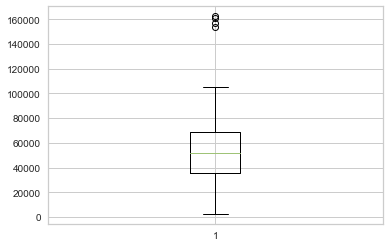

In [489]:
plt.boxplot(df['Income'])

In [490]:
df[df['Income'] > 120000]

Unnamed: 0    ID   Education Marital_Status    Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age
164         164  8475         PhD        Married  157243.0        0         1  01-03-2014       98        20          2             1582                1                 2             1                 15                0                   22                  0                  0             0             0             0             0             0         0         0   48
617         617  1503         PhD       Together  162397.0        1         1  03-06-2013       31        85          1               16                2                 1             2                  0                0                    0                  1                  1             0             0             0             0             0         0         0   45
655         655  5555  Graduation       Divorced  153924.0        0         0  07-02-2014       81         1          1                1                1                 1             1                  0                0                    0                  0                  0             0             0             0             0             0         0         0   46
687         687  1501         PhD        Married  160803.0        0         0  04-08-2012       21        55         16             1622               17                 3             4                 15                0                   28                  1                  0             0             0             0             0             0         0         0   39

As you can see in the above income has some outliers I will drop them.

In [491]:
df.isnull().sum()

Unnamed: 0             0
ID                     0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
dtype: int64

In [492]:
df.head()

Unnamed: 0    ID   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age
0           0  5524  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1   64
1           1  2174  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0   67
2           2  4141  Graduation       Together  71613.0        0         0  21-08-2013       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0   56
3           3  6182  Graduation       Together  26646.0        1         0  10-02-2014       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0   37
4           4  5324         PhD        Married  58293.0        1         0  19-01-2014       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0   40

In [493]:
df.drop(["Unnamed: 0", "ID"], axis=1, inplace=True)
df.head()

Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age
0  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1   64
1  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0   67
2  Graduation       Together  71613.0        0         0  21-08-2013       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0   56
3  Graduation       Together  26646.0        1         0  10-02-2014       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0   37
4         PhD        Married  58293.0        1         0  19-01-2014       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0   40

I droped Unnamed:0 and Id columns because they are like name of row and they will not useful for my models. 

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1001 non-null   object 
 1   Marital_Status       1001 non-null   object 
 2   Income               1001 non-null   float64
 3   Kidhome              1001 non-null   int64  
 4   Teenhome             1001 non-null   int64  
 5   Dt_Customer          1001 non-null   object 
 6   Recency              1001 non-null   int64  
 7   MntWines             1001 non-null   int64  
 8   MntFruits            1001 non-null   int64  
 9   MntMeatProducts      1001 non-null   int64  
 10  MntFishProducts      1001 non-null   int64  
 11  MntSweetProducts     1001 non-null   int64  
 12  MntGoldProds         1001 non-null   int64  
 13  NumDealsPurchases    1001 non-null   int64  
 14  NumWebPurchases      1001 non-null   int64  
 15  NumCatalogPurchases  1001 non-null   i

In [495]:
df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64[ns]')
today = np.datetime64('today')

In [496]:
df['dayOfCustomer'] = (today - df['Dt_Customer']).dt.days
df.drop('Dt_Customer', axis=1, inplace=True)

Firstly I converted  Dt_Customer feature to datetime type and after date I created new column which is dayOfCustomer. This columns is number of day of customer. Finally I droped Dt_Customer column. I did this because it will more useful in this format than datetime format.

In [497]:
df.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  dayOfCustomer
0  Graduation         Single  58138.0        0         0       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1   64           3551
1  Graduation         Single  46344.0        1         1       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0   67           2705
2  Graduation       Together  71613.0        0         0       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0   56           3052
3  Graduation       Together  26646.0        1         0       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0   37           2645
4         PhD        Married  58293.0        1         0       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0   40           2901

In [498]:
X = pd.get_dummies(df)

In [499]:
X.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  dayOfCustomer  Education_2n Cycle  Education_Basic  Education_Graduation  Education_Master  Education_PhD  Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow
0  58138.0        0         0       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1   64           3551                   0                0                     1                 0              0                     0                        0                       0                      1                        0                     0
1  46344.0        1         1       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0   67           2705                   0                0                     1                 0              0                     0                        0                       0                      1                        0                     0
2  71613.0        0         0       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0   56           3052                   0                0                     1                 0              0                     0                        0                       0                      0                        1                     0
3  26646.0        1         0       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0   37           2645                   0                0                     1                 0              0                     0                        0                       0                      0                        1                     0
4  58293.0        1         0       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0   40           2901                   0                0                     0                 0              1                     0                        0                       1                      0                        0                     0

<AxesSubplot:>

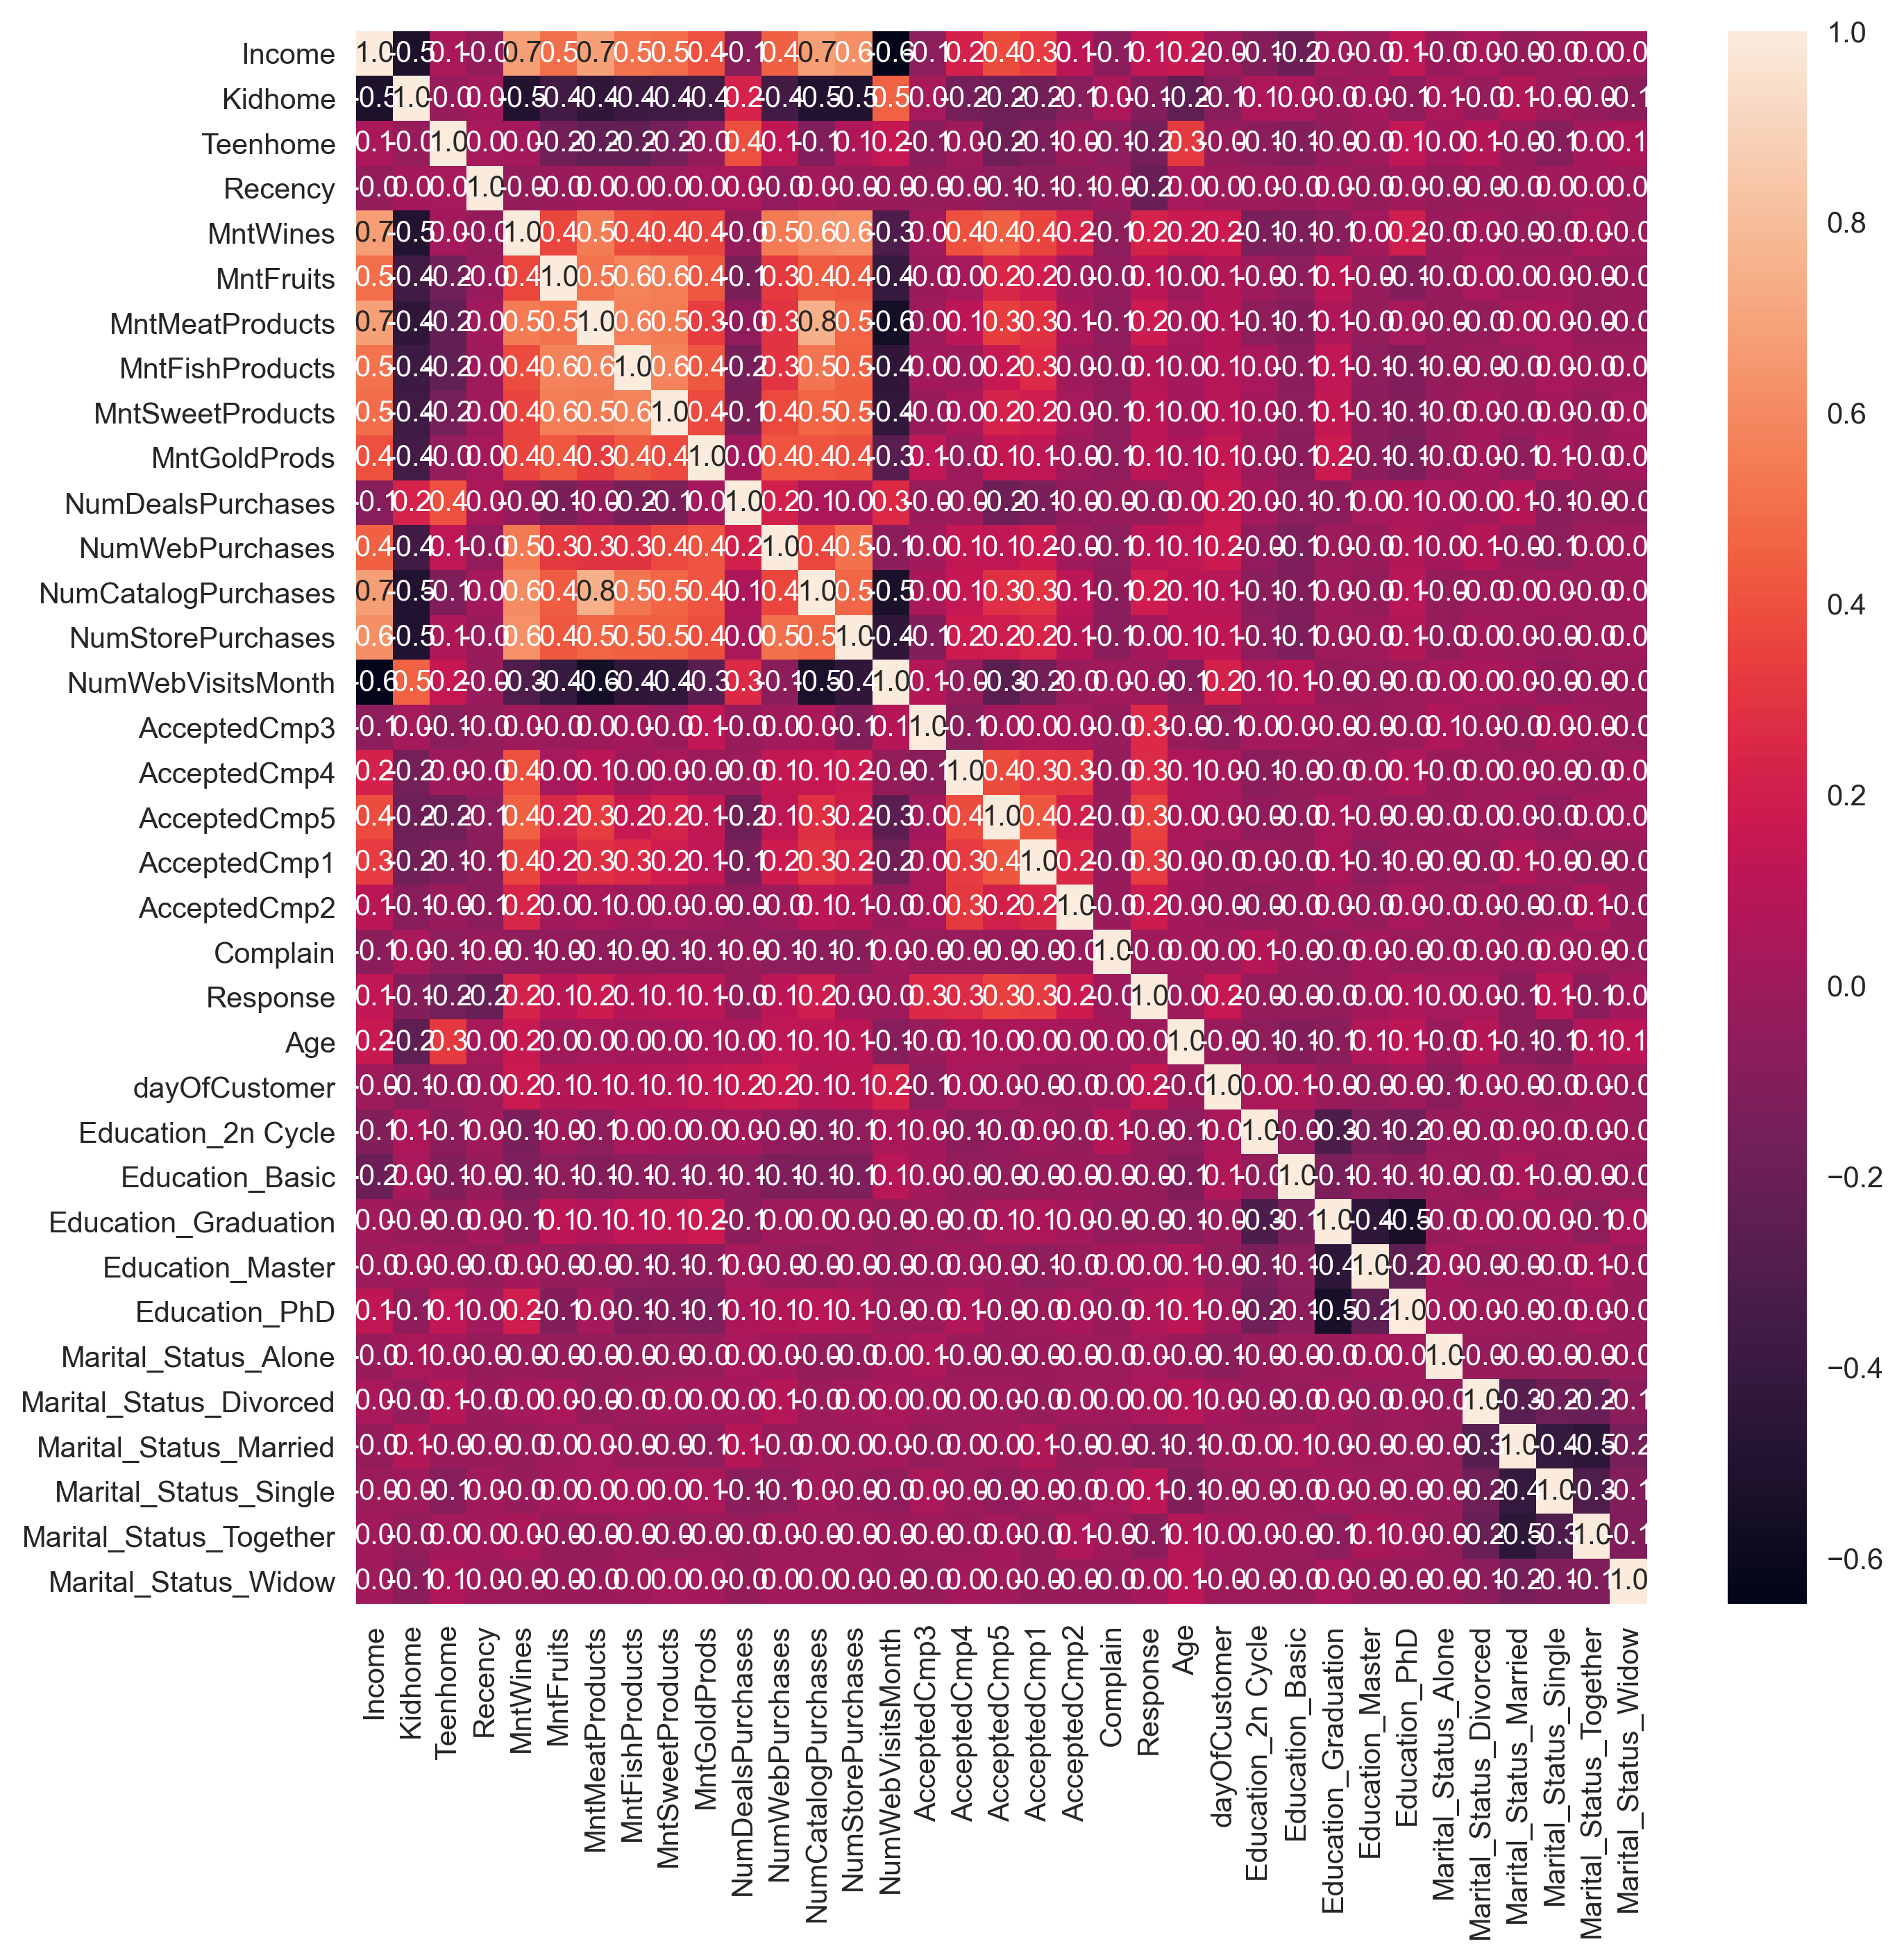

In [500]:
plt.figure(figsize=(10,10), dpi=300)
sns.heatmap(X.corr(),annot=True,fmt='0.1f')

In [501]:
from sklearn.preprocessing import StandardScaler

In [502]:
scaler = StandardScaler()

In [503]:
scaled_X = scaler.fit_transform(X)
pd.DataFrame(scaled_X)

0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34
0     0.259310 -0.813937 -0.874547  0.309087  0.969702  1.580408  1.642666  2.467096  1.467778  0.803924  0.381747  1.471218  2.335628 -0.567136  0.731180 -0.261349 -0.286639 -0.269969 -0.261349 -0.119098 -0.089757  2.532748  0.951865  2.046464 -0.314313 -0.135319  0.993031 -0.441034 -0.540012 -0.054827 -0.353156 -0.770681  1.873235 -0.584656 -0.195913
1    -0.283502  0.976724  0.934175 -0.384937 -0.877207 -0.623553 -0.725656 -0.661962 -0.644358 -0.725693 -0.153447 -1.112447 -0.572287 -1.183200 -0.099122 -0.261349 -0.286639 -0.269969 -0.261349 -0.119098 -0.089757 -0.394828  1.193779 -1.689518 -0.314313 -0.135319  0.993031 -0.441034 -0.540012 -0.054827 -0.353156 -0.770681  1.873235 -0.584656 -0.195913
2     0.879490 -0.813937 -0.874547 -0.801351  0.351106  0.592425 -0.194977  1.344316 -0.158810 -0.054154 -0.688641  1.471218 -0.249185  1.281057 -0.514273 -0.261349 -0.286639 -0.269969 -0.261349 -0.119098 -0.089757 -0.394828  0.306762 -0.157147 -0.314313 -0.135319  0.993031 -0.441034 -0.540012 -0.054827 -0.353156 -0.770681 -0.533836  1.710406 -0.195913
3    -1.190091  0.976724 -0.874547 -0.801351 -0.877207 -0.547555 -0.664255 -0.514712 -0.595803 -0.744347 -0.153447 -0.743352 -0.895389 -0.567136  0.316029 -0.261349 -0.286639 -0.269969 -0.261349 -0.119098 -0.089757 -0.394828 -1.225357 -1.954481 -0.314313 -0.135319  0.993031 -0.441034 -0.540012 -0.054827 -0.353156 -0.770681 -0.533836  1.710406 -0.195913
4     0.266444  0.976724 -0.874547  1.558329 -0.397721  0.440428 -0.234449  0.147912 -0.013145 -0.557808  1.452135  0.363933  0.073916  0.048928 -0.099122 -0.261349 -0.286639 -0.269969 -0.261349 -0.119098 -0.089757 -0.394828 -0.983444 -0.823971 -0.314313 -0.135319 -1.007018 -0.441034  1.851811 -0.054827 -0.353156  1.297554 -0.533836 -0.584656 -0.195913
...        ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...
996   1.055487 -0.813937 -0.874547 -0.836052  1.443269 -0.648886  1.638280  1.049817  0.739455 -0.837616 -0.688641  1.471218  0.397018  1.281057  0.316029 -0.261349 -0.286639 -0.269969  3.826307 -0.119098 -0.089757 -0.394828 -0.741530 -0.249884 -0.314313 -0.135319  0.993031 -0.441034 -0.540012 -0.054827 -0.353156 -0.770681 -0.533836  1.710406 -0.195913
997  -1.215635  0.976724  0.934175  1.211318 -0.865368 -0.395557 -0.668641 -0.551525 -0.255919 -0.464539  0.381747 -0.743352 -0.572287 -0.875168 -0.099122 -0.261349 -0.286639 -0.269969 -0.261349 -0.119098 -0.089757 -0.394828  0.951865 -0.987365 -0.314313 -0.135319  0.993031 -0.441034 -0.540012 -0.054827 -0.353156 -0.770681 -0.533836  1.710406 -0.195913
998   0.015703  0.976724 -0.874547 -1.460674  0.226795 -0.015564  0.528677  1.694035  0.326739  0.356231  0.381747  1.471218  1.689425  0.048928  0.316029  3.826307 -0.286639 -0.269969 -0.261349 -0.119098 -0.089757 -0.394828 -0.338341 -0.121819 -0.314313 -0.135319  0.993031 -0.441034 -0.540012 -0.054827 -0.353156  1.297554 -0.533836 -0.584656 -0.195913
999  -0.295376 -0.813937  0.934175 -0.523742 -0.187576 -0.446223 -0.611626 -0.569931 -0.620081  0.095077  0.916941 -0.374257 -0.572287  0.664993 -0.514273 -0.261349 -0.286639 -0.269969 -0.261349 -0.119098 -0.089757 -0.394828  1.032503  0.562670 -0.314313 -0.135319  0.993031 -0.441034 -0.540012 -0.054827  2.831610 -0.770681 -0.533836 -0.584656 -0.195913
1000  1.174737 -0.813937  0.934175 -0.384937 -0.442118 -0.167561  0.511134 -0.238619 -0.668636 -0.128769 -0

In here I did normalization. I scaled whole data to specific range.This is my model's one of the data preprocesing part.

In [504]:
from sklearn.cluster import KMeans

ssd = []

for k in range(2, 30):
    
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)

Text(0, 0.5, 'sum of squared distance')

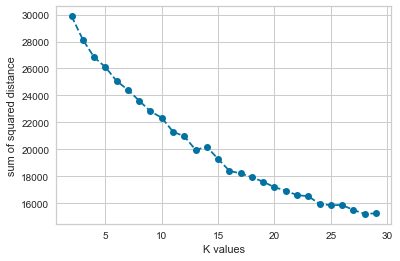

In [505]:
plt.plot(range(2,30), ssd, 'o--')
plt.xlabel('K values')
plt.ylabel('sum of squared distance')

In here we created elbow function. We did this because we had to decide value k which is number of cluster. Both number of K values and sum of squared distance should be small as much as possible. This is elbow point in the graph. As you can see when k is equal 5, graph is like elbow and K value is small to so I chosed K as 5.

<AxesSubplot:>

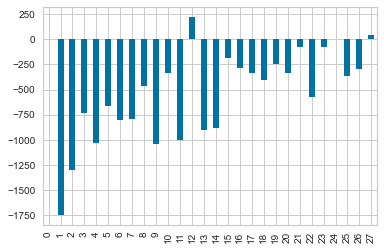

In [506]:
pd.Series(ssd).diff().plot(kind='bar')

This is the another representation of squared distance. As you can see difference is nearly linear when K is equal to 5.

In [507]:
model = KMeans(n_clusters=5, random_state=42)
cluster_labels = model.fit_predict(scaled_X)

We build ou model and predicted lables. We used fit_predict because ın cluster models we can do both of them in same method.

In [508]:
cluster_labels

array([0, 4, 0, ..., 0, 1, 2])

In [509]:
X['K5 Clusterd'] = cluster_labels

In [510]:
X.corr()['K5 Clusterd'].sort_values()

NumStorePurchases         -0.717185
Income                    -0.694818
NumCatalogPurchases       -0.656454
MntWines                  -0.618116
MntMeatProducts           -0.611073
NumWebPurchases           -0.598300
MntFishProducts           -0.567731
MntSweetProducts          -0.522552
MntFruits                 -0.504646
MntGoldProds              -0.500744
Age                       -0.192878
AcceptedCmp1              -0.144762
dayOfCustomer             -0.109930
AcceptedCmp4              -0.108914
NumDealsPurchases         -0.097765
Education_PhD             -0.090213
Teenhome                  -0.080523
AcceptedCmp5              -0.032645
Marital_Status_Divorced   -0.028816
Response                  -0.024949
Marital_Status_Widow      -0.020228
Marital_Status_Together   -0.019034
AcceptedCmp2              -0.017408
Education_Graduation      -0.006725
Education_Master           0.004864
Marital_Status_Single      0.009904
Recency                    0.014644
Marital_Status_Alone       0

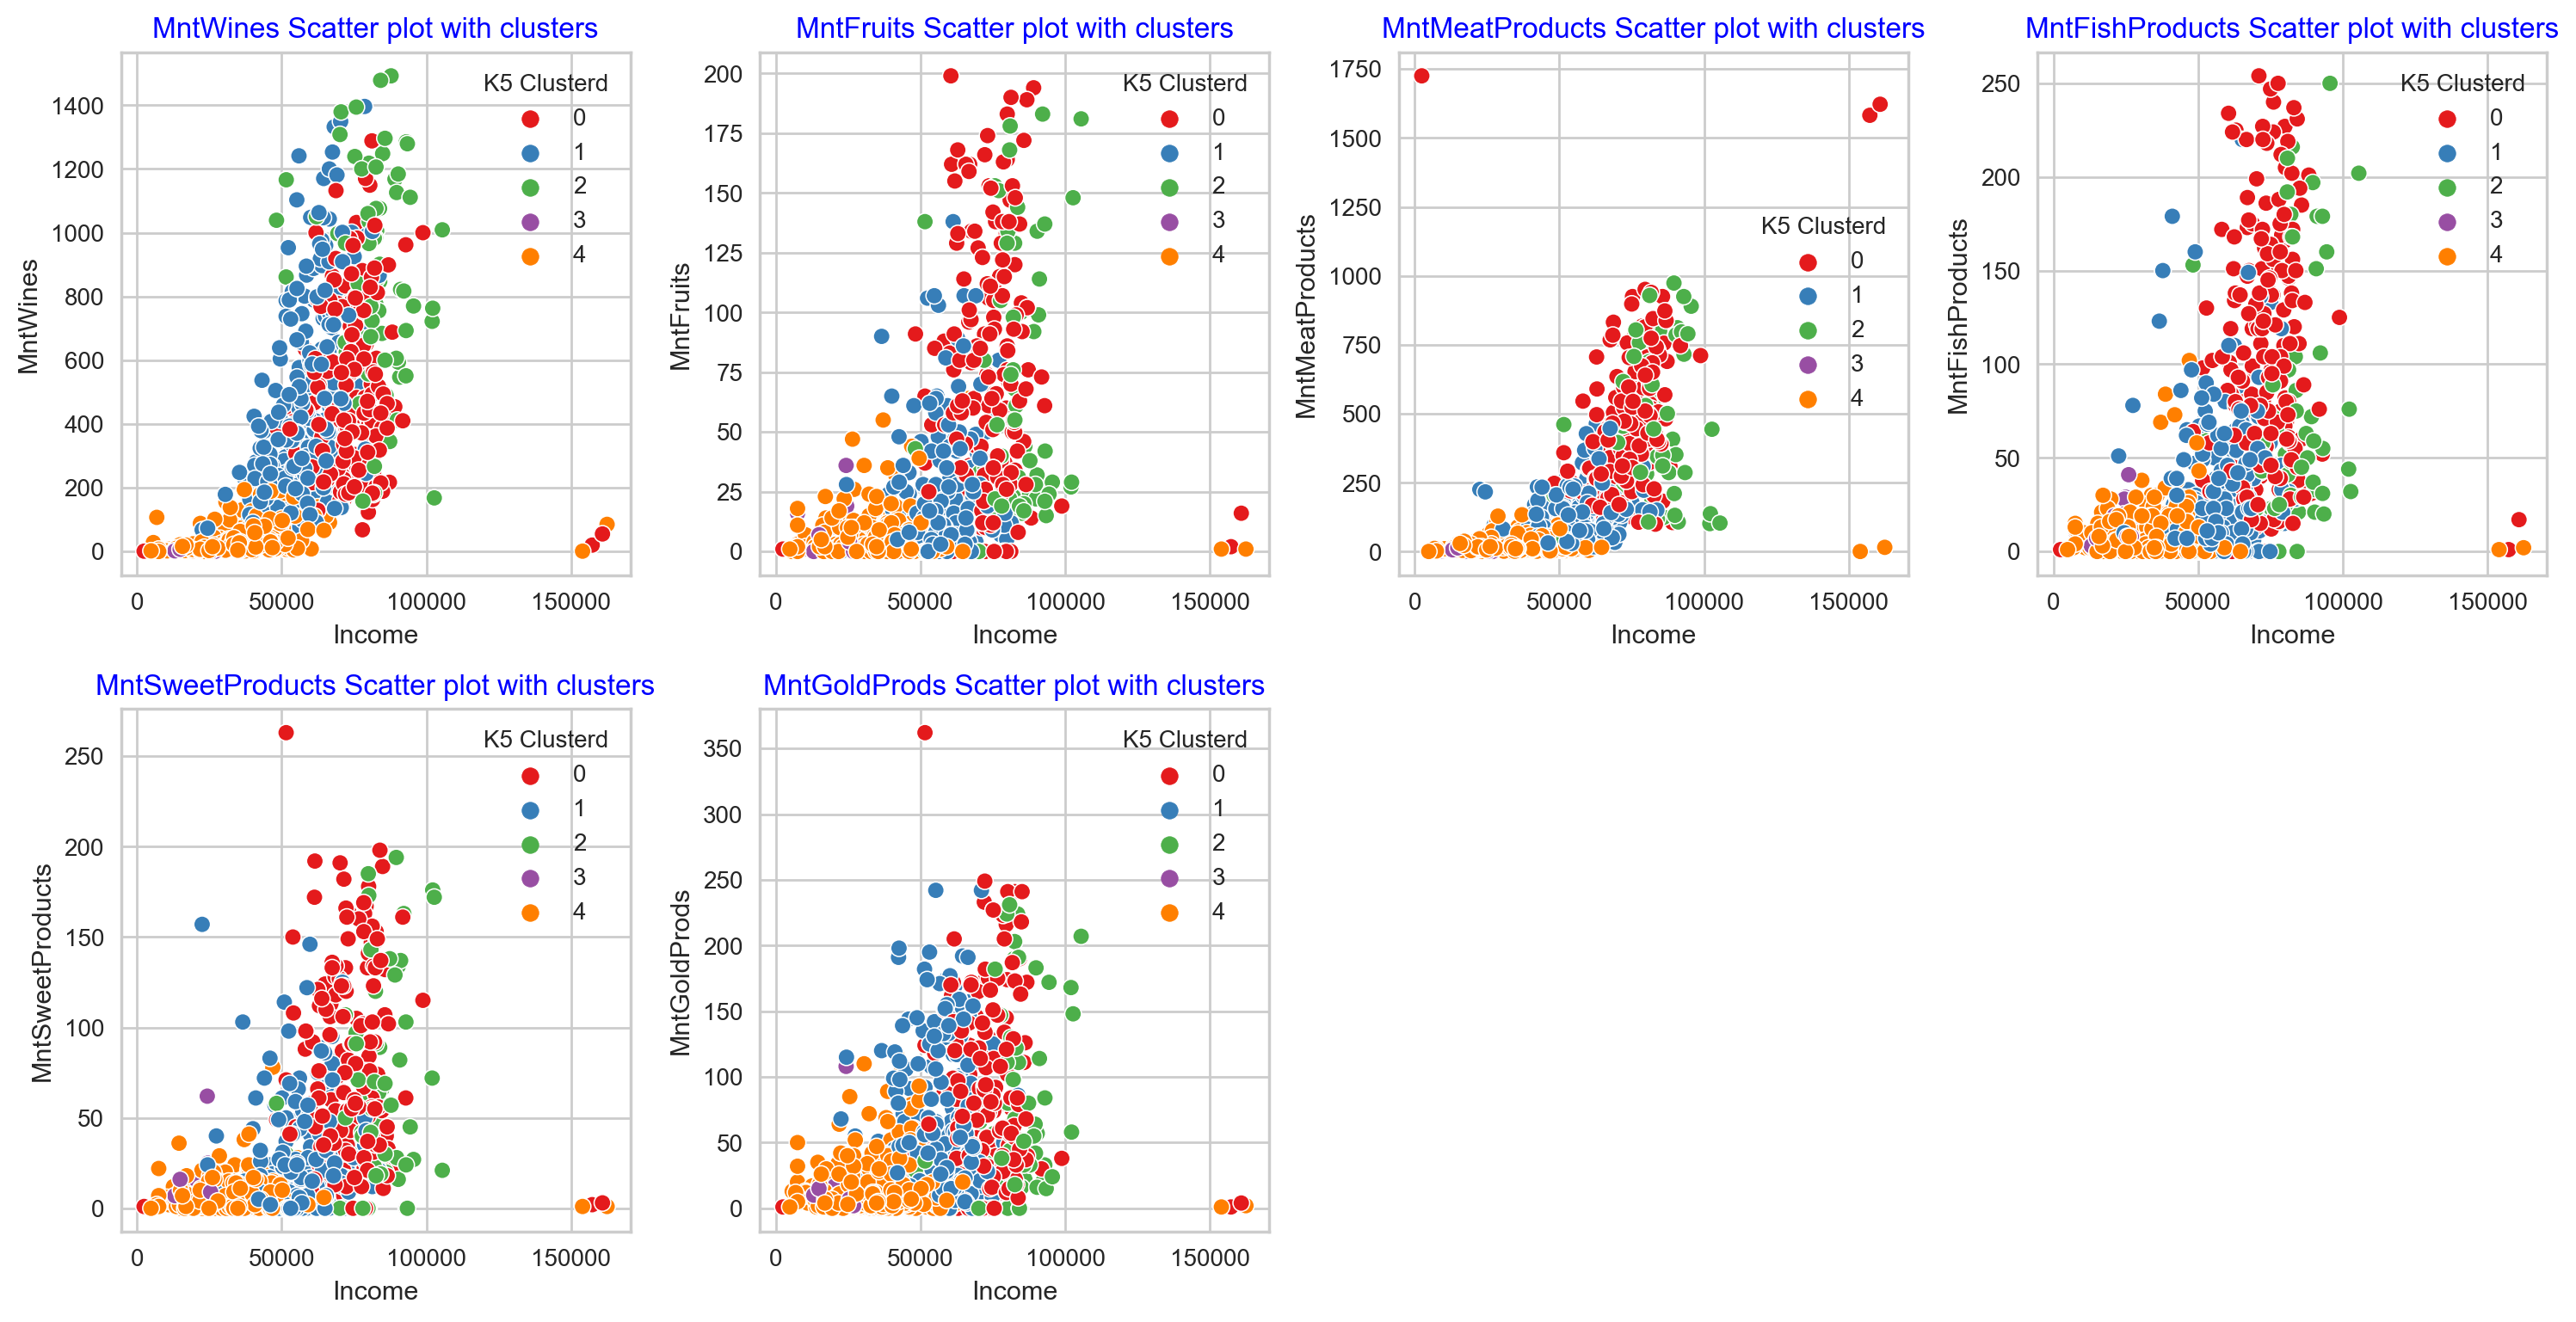

In [511]:
f=plt.figure(figsize=(15,15), dpi=200)
scatter_cols =['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for i, col in enumerate(scatter_cols):
    ax=f.add_subplot(4,4,i+1)
    sns.scatterplot(x=X['Income'],y=X[col],hue=X['K5 Clusterd'],palette='Set1')
    ax.set_title(col+" Scatter plot with clusters",color='blue')
    plt.ylabel(col)
f.tight_layout()

As you can see our data is well clustered for KMean model this model has 5 cluster. I plot scatter plot of spent money as Y label and Income as X label.

In [512]:
X

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  dayOfCustomer  Education_2n Cycle  Education_Basic  Education_Graduation  Education_Master  Education_PhD  Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  K5 Clusterd
0     58138.0        0         0       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0         1   64           3551                   0                0                     1                 0              0                     0                        0                       0                      1                        0                     0            0
1     46344.0        1         1       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0         0   67           2705                   0                0                     1                 0              0                     0                        0                       0                      1                        0                     0            4
2     71613.0        0         0       26       426         49              127              111                21            42                  1                8                    2                 10                  4             0             0             0             0             0         0         0   56           3052                   0                0                     1                 0              0                     0                        0                       0                      0                        1                     0            0
3     26646.0        1         0       26        11          4               20               10                 3             5                  2                2                    0                  4                  6             0             0             0             0             0         0         0   37           2645                   0                0                     1                 0              0                     0                        0                       0                      0                        1                     0            4
4     58293.0        1         0       94       173         43              118               46                27            15                  5                5                    3                  6                  5             0             0             0             0             0         0         0   40           2901                   0                0                     0                 0              1                     0                        0                       1                      0                        0                     0            1
...       ...      ...       ...      ...       ...        ...              ...              ...               ...           ...                ...              ...                  ...                ...                ...           ...           ...           ...           ...           ...       ...       ...  ...            ...                 ...              ...                   ...               ...            ...                   ...                      ...                     ...                    ...        

In [513]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
MinMaxscaled_X = scaler.fit_transform(pd.get_dummies(df))

<Figure size 1080x576 with 0 Axes>

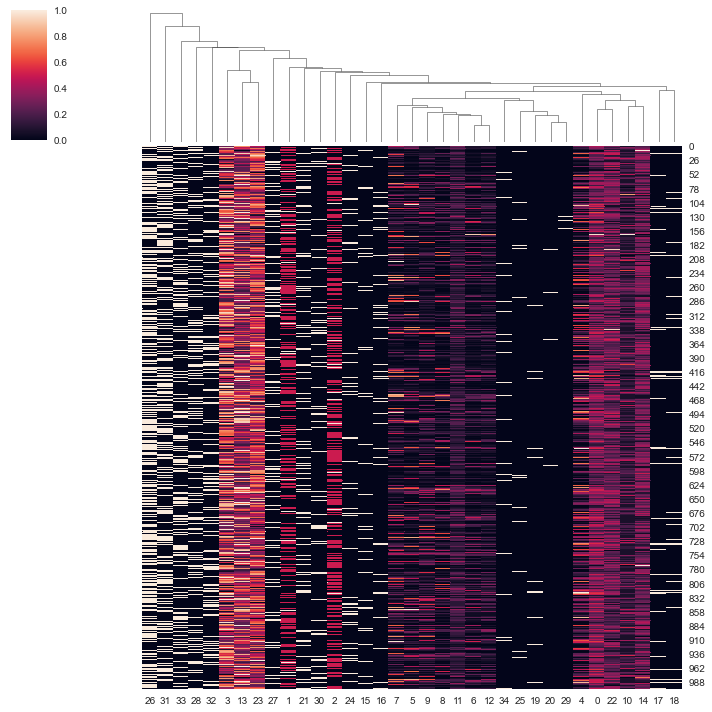

In [514]:
plt.figure(figsize=(15,8))
sns.clustermap(MinMaxscaled_X, row_cluster=False)

In [515]:
from sklearn.cluster import AgglomerativeClustering
modelAg4 = AgglomerativeClustering(n_clusters=4, linkage='ward')
Agcluster_labels = modelAg4.fit_predict(X)
Agcluster_labels

array([2, 1, 2, ..., 2, 1, 0], dtype=int64)

In [516]:
X['AgClusterd4'] = Agcluster_labels

In [517]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [518]:
linkage_matrix = hierarchy.linkage(modelAg4.children_)

In [519]:
linkage_matrix

array([[6.87000000e+02, 7.68000000e+02, 1.41421356e+00, 2.00000000e+00],
       [8.76000000e+02, 9.01000000e+02, 1.41421356e+00, 2.00000000e+00],
       [9.93000000e+02, 9.94000000e+02, 1.41421356e+00, 2.00000000e+00],
       ...,
       [9.41000000e+02, 9.54000000e+02, 1.15069544e+02, 2.00000000e+00],
       [8.19000000e+02, 1.99500000e+03, 1.31045794e+02, 9.98000000e+02],
       [1.99600000e+03, 1.99700000e+03, 1.40071410e+02, 1.00000000e+03]])

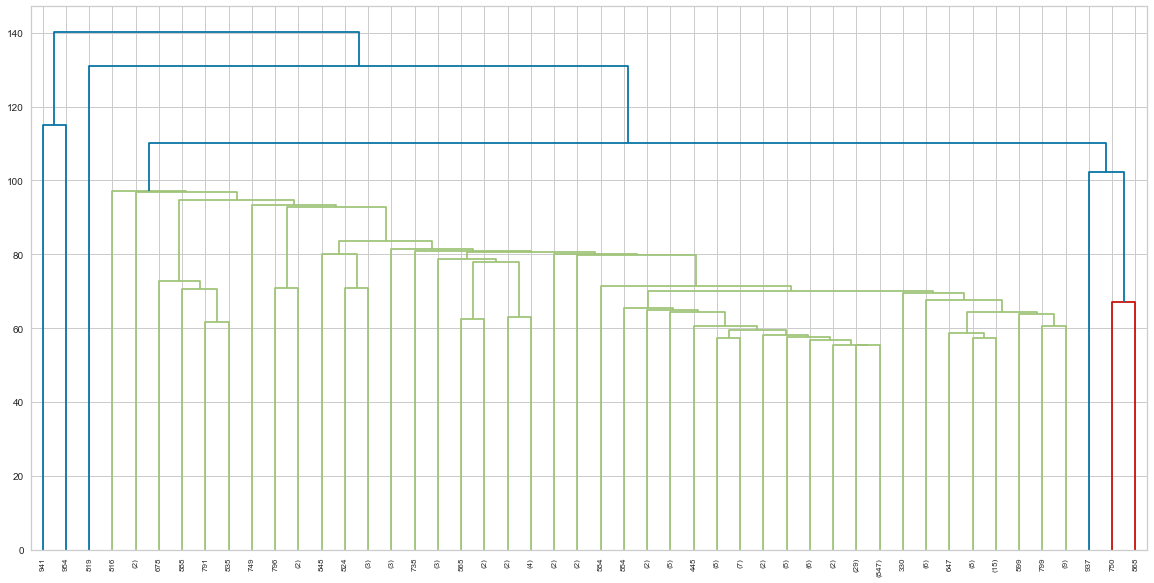

In [520]:
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='lastp',p=48)

you can see dendrogram  in the above we can choose number of cluster with this information but we can't decide just this graph we should consider other solution too.

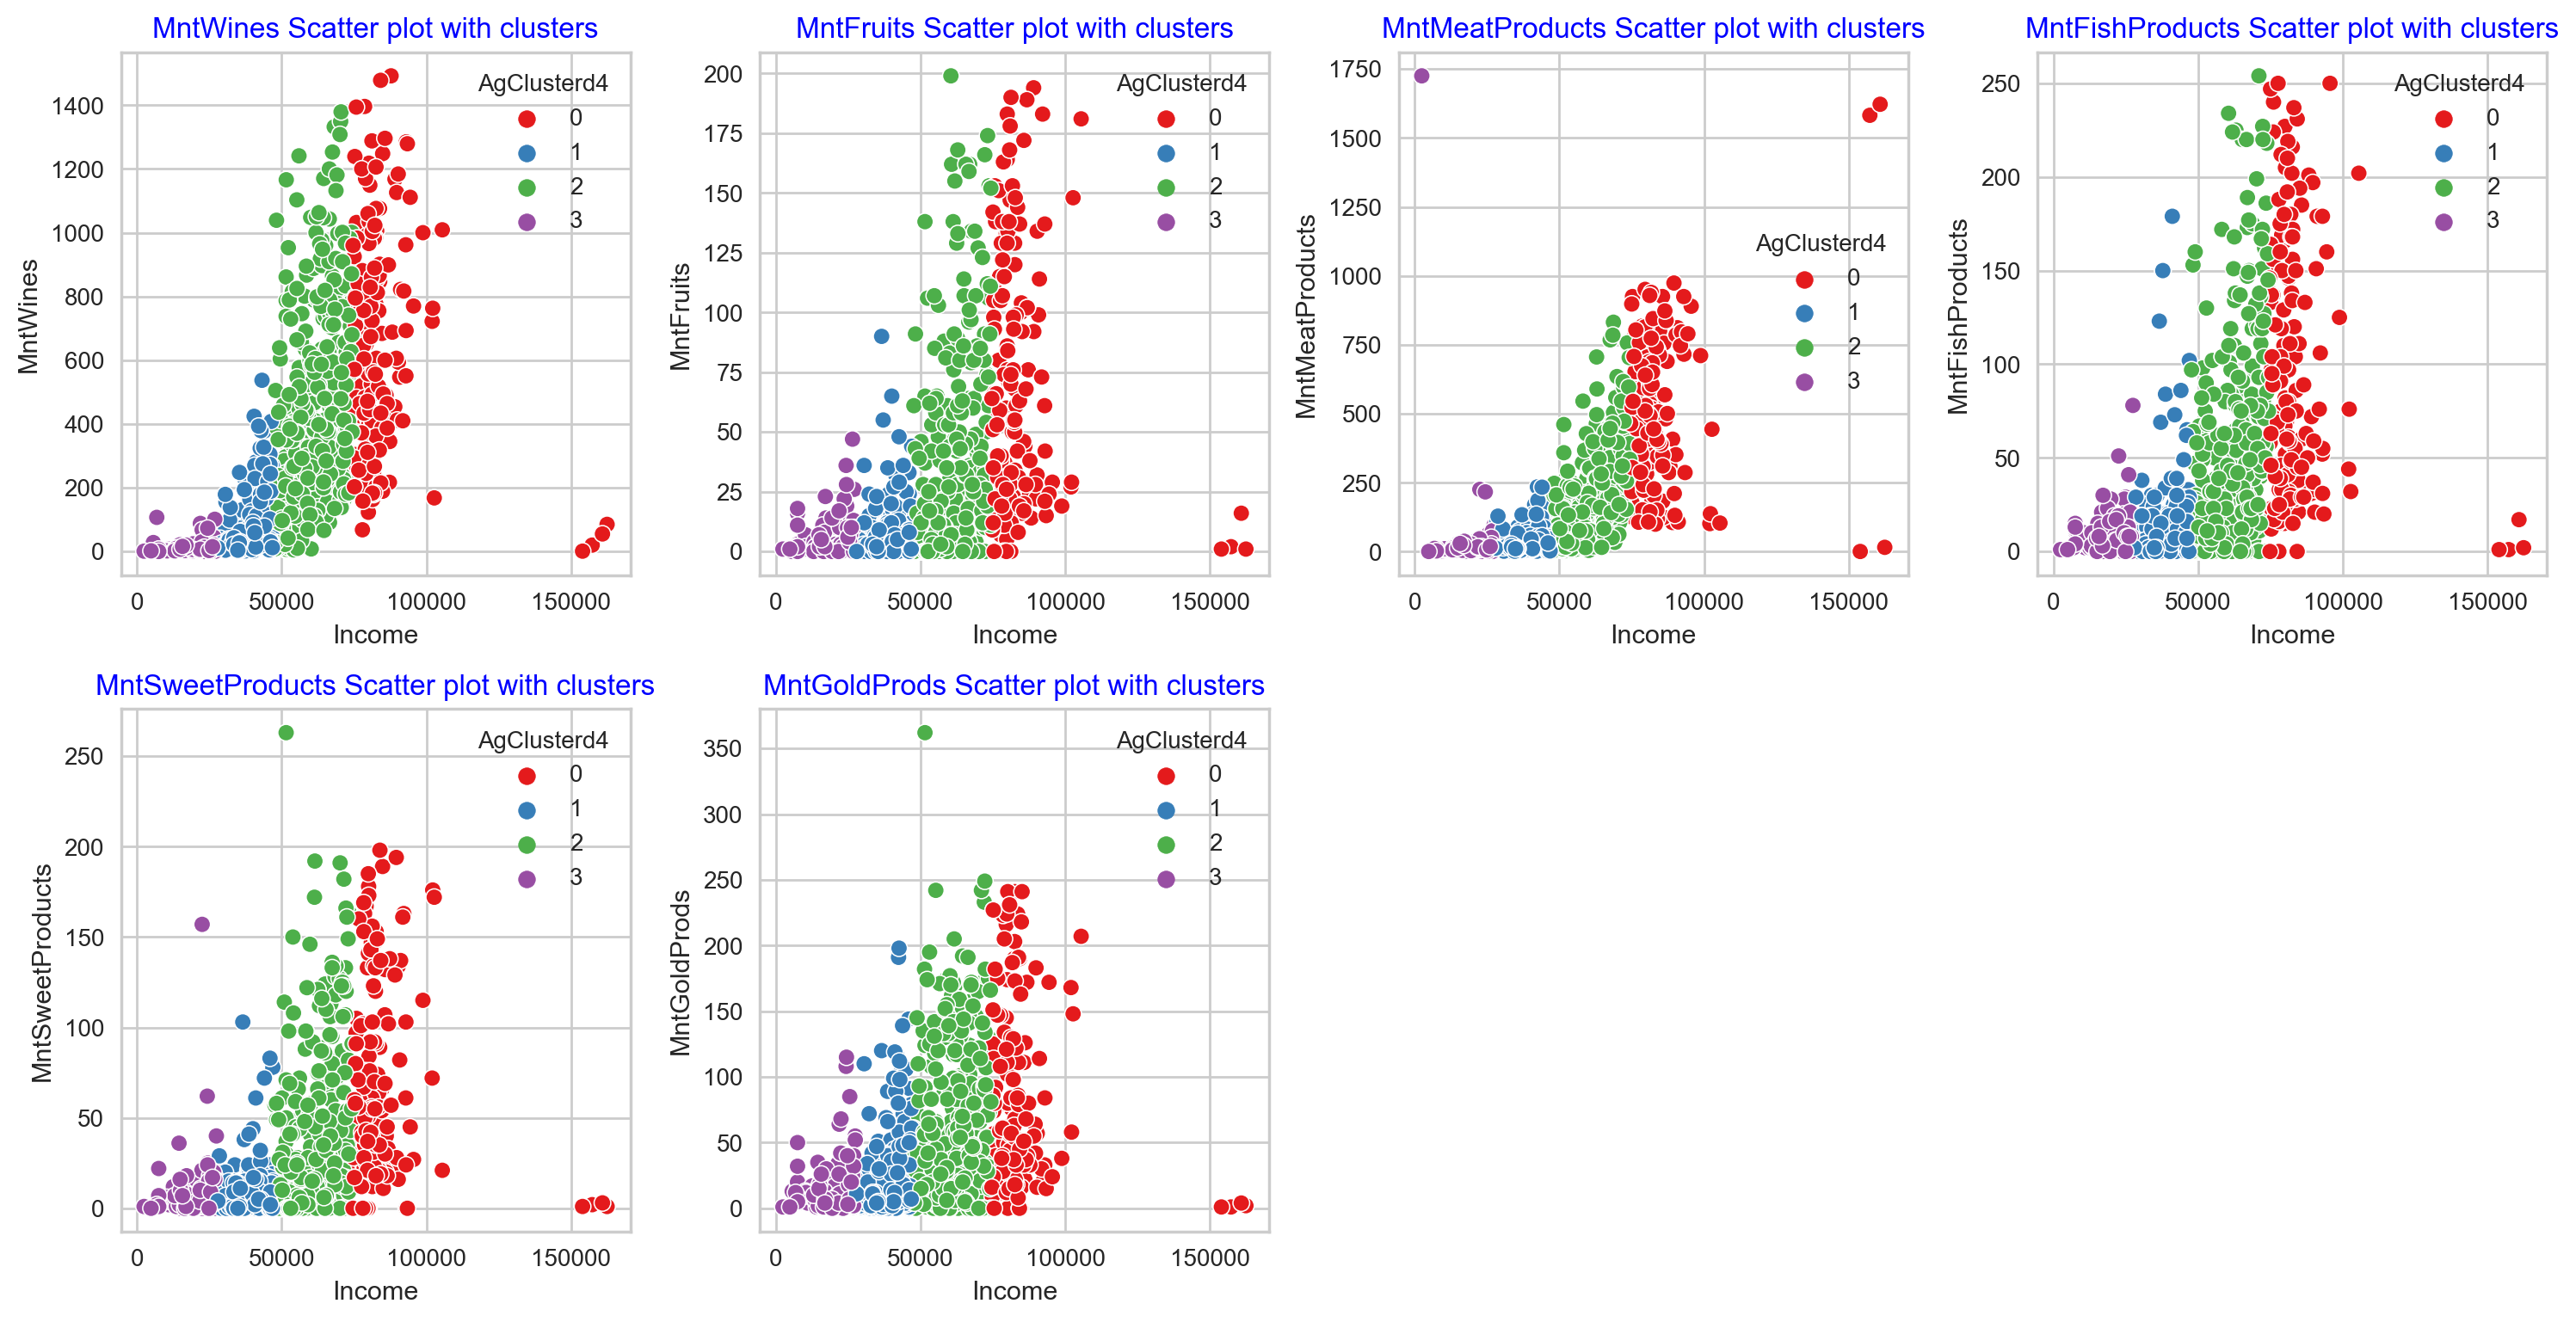

In [521]:
f=plt.figure(figsize=(15,15), dpi=200)
scatter_cols =['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for i, col in enumerate(scatter_cols):
    ax=f.add_subplot(4,4,i+1)
    sns.scatterplot(x=X['Income'],y=X[col],hue=X['AgClusterd4'],palette='Set1')
    ax.set_title(col+" Scatter plot with clusters",color='blue')
    plt.ylabel(col)
f.tight_layout()

As you can see in scatter plot of KMean model and Agglomerative Clustering model, KMean is well clustered than Agglomerative Clusturing. You can see it as intuitively.

In [522]:
from sklearn.metrics import silhouette_score, silhouette_samples

silScore = []

for n_clusters in range(2,30):
    model = KMeans (n_clusters=n_clusters)
    preds = model.fit_predict(X)
    centers = model.cluster_centers_

    score = silhouette_score(scaled_X, preds, metric='euclidean')
    silScore.append(score)
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.13094708028344368
For n_clusters = 3, silhouette score is 0.047770913541672275
For n_clusters = 4, silhouette score is 0.018882173022090238
For n_clusters = 5, silhouette score is 0.019351503578128083
For n_clusters = 6, silhouette score is 0.0009963126168571284
For n_clusters = 7, silhouette score is -0.007675838627877403
For n_clusters = 8, silhouette score is -0.01287384336004193
For n_clusters = 9, silhouette score is -0.016351312550965624
For n_clusters = 10, silhouette score is -0.01952936447409478
For n_clusters = 11, silhouette score is -0.02443774411977784
For n_clusters = 12, silhouette score is -0.0281260935235228
For n_clusters = 13, silhouette score is -0.03084027405468749
For n_clusters = 14, silhouette score is -0.03340287457833339
For n_clusters = 15, silhouette score is -0.03505812362023702
For n_clusters = 16, silhouette score is -0.042319454671883465
For n_clusters = 17, silhouette score is -0.040129979652668575
For n_cluster

Text(0, 0.5, 'silhouette score')

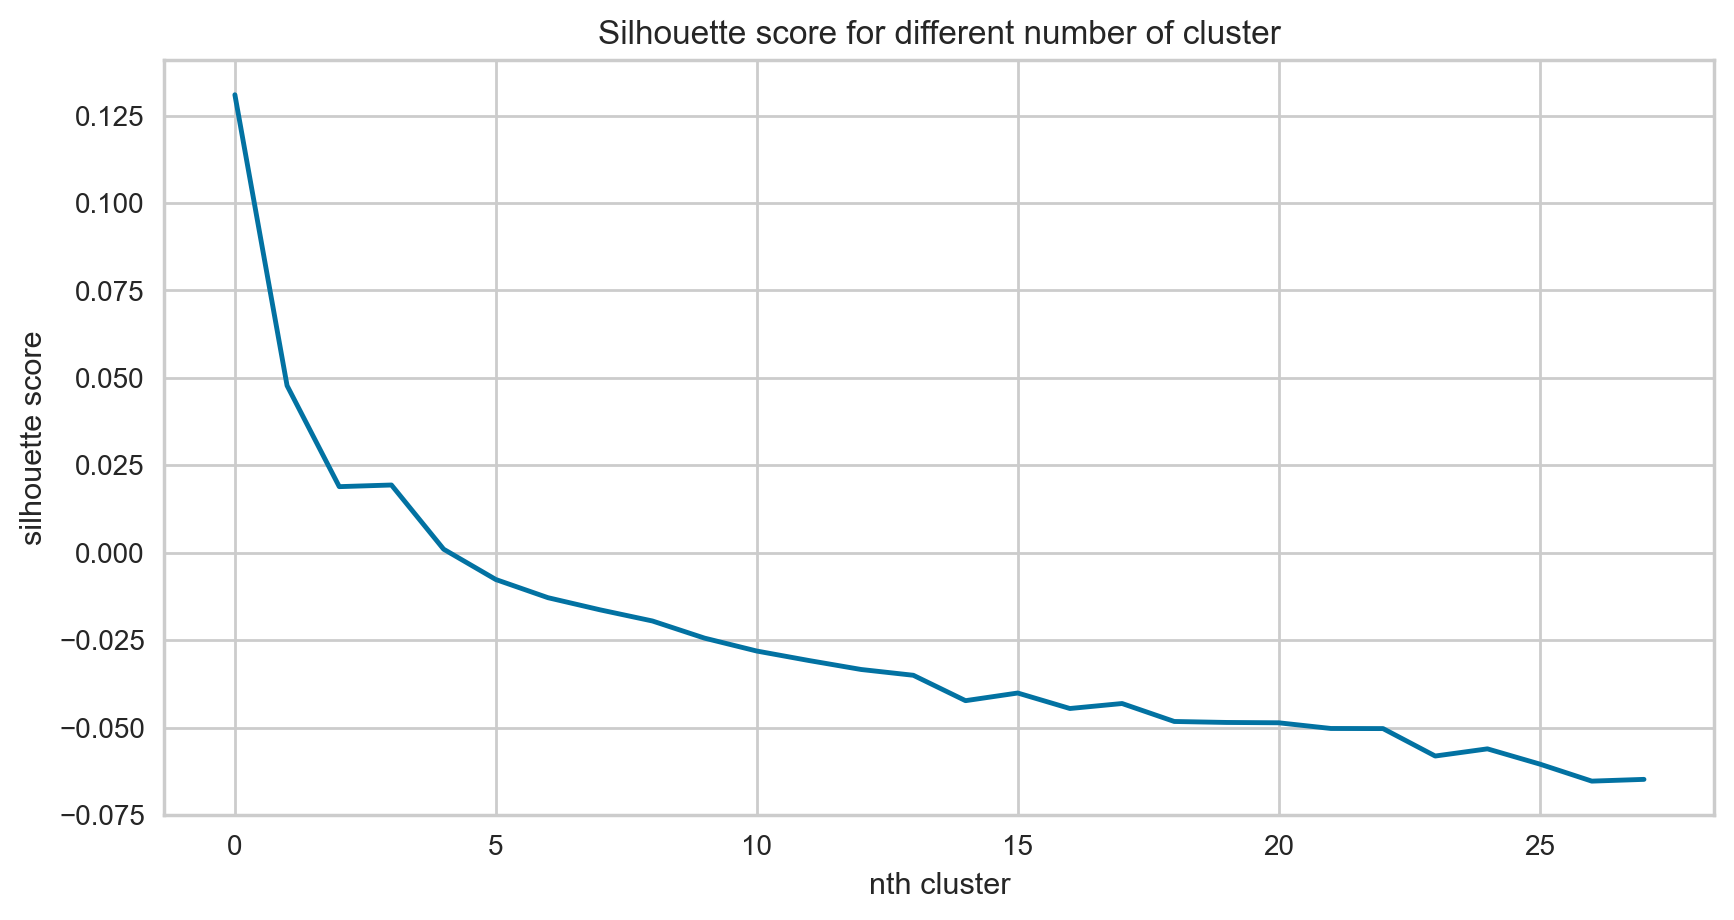

In [523]:
plt.figure(figsize=(10,5), dpi=200)
plt.title('Silhouette score for different number of cluster')
plt.plot(silScore)
plt.xlabel('nth cluster')
plt.ylabel('silhouette score')

As you can see we have better silhouette score when the number of cluster is small.

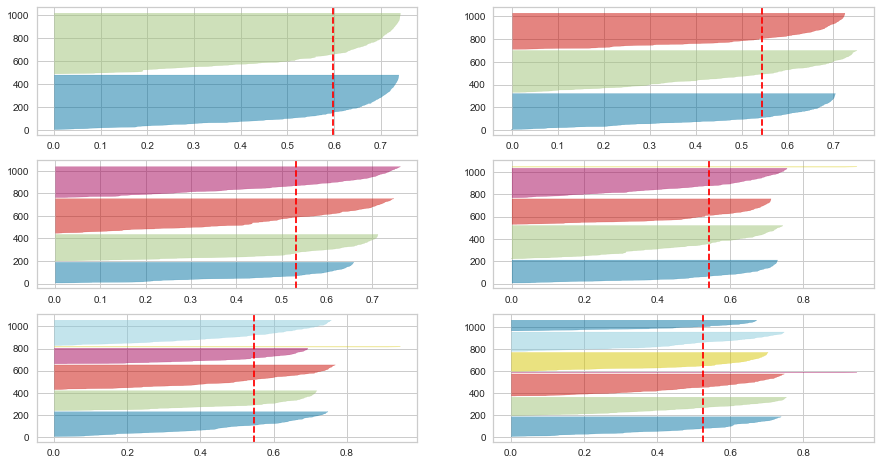

In [524]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in range(2,8):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Here is the Silhouette analysis done on the above plots to select an optimal value for n_clusters. The value of n_clusters as 6 and 7 looks dont well clustered because silhouette scores of them is small and there is Wide fluctuations in the size of the silhouette plots. As you can see some of them have nearly zero area. The value of 4 and 5 for n_clusters looks well clustered. The silhouette score for each cluster is above average silhouette scores. Also, the fluctuation in size is similar.